# WeatherPy

Observations
1 - The closer you get to the equator line, the higher the temperature will be.
2 - The further away from the equator line you get, there is a chance of higher wind speeds.
3 - In the Southern Hemisphere, it gets more humid the more you move away from the equator line.

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
from scipy.stats import linregress

# Import API Key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Setting the url to call the API
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
# query_url = f"{url}appid={weather_api_key}&units{units}&q="

In [4]:
# Creating empty lists 
city_name = []
max_temps = []
humidity_level = []
cloudiness = []
wind_speed = []
country_name = []
date = []
lat = []
lng = []

counter = 0
counter_two = 1

# Starting the for loop to call on the API Data

print(f'Gathering Weather Data')
print(f'-----------------------')

for city in cities:
    try:
        # Converting into a JSON
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        city_response = requests.get(query_url)
        city_json = city_response.json()
        
        
        
        # Fill empty lists above with weather data
        city_name.append(city_json["name"])
        cloudiness.append(city_json["clouds"]["all"])
        max_temps.append(city_json["main"]["temp_max"])
        humidity_level.append(city_json["main"]["humidity"])
        wind_speed.append(city_json["wind"]["speed"])
        country_name.append(city_json["sys"]["country"])
        date.append(city_json["dt"])
        lat.append(city_json["coord"]["lat"])
        lng.append(city_json["coord"]["lon"])
        
        if counter > 49:
            counter = 1
            counter_two += 1
        else: 
            counter += 1
        
        print(f"Processing Record {counter} of set {counter_two} | {city}")
    
    except Exception:
        print("City not found. Skipping....")
        
print("-----------------------")
print("Weather Data Complete")

Gathering Weather Data
-----------------------
Processing Record 1 of set 1 | solnechnyy
Processing Record 2 of set 1 | ponta do sol
Processing Record 3 of set 1 | ocampo
Processing Record 4 of set 1 | lebu
Processing Record 5 of set 1 | punta arenas
Processing Record 6 of set 1 | mahebourg
Processing Record 7 of set 1 | cherskiy
Processing Record 8 of set 1 | touros
Processing Record 9 of set 1 | sao joao da barra
City not found. Skipping....
Processing Record 10 of set 1 | rikitea
Processing Record 11 of set 1 | castro
Processing Record 12 of set 1 | tuensang
Processing Record 13 of set 1 | tuktoyaktuk
Processing Record 14 of set 1 | panama city
Processing Record 15 of set 1 | kapaa
Processing Record 16 of set 1 | aksarka
Processing Record 17 of set 1 | ushuaia
Processing Record 18 of set 1 | beringovskiy
Processing Record 19 of set 1 | hithadhoo
Processing Record 20 of set 1 | carnarvon
City not found. Skipping....
Processing Record 21 of set 1 | mahon
Processing Record 22 of set 1 

City not found. Skipping....
Processing Record 36 of set 4 | peto
Processing Record 37 of set 4 | tsiroanomandidy
Processing Record 38 of set 4 | port macquarie
Processing Record 39 of set 4 | yulara
Processing Record 40 of set 4 | barrow
Processing Record 41 of set 4 | avarua
Processing Record 42 of set 4 | lompoc
Processing Record 43 of set 4 | nome
Processing Record 44 of set 4 | baragua
Processing Record 45 of set 4 | katsuura
Processing Record 46 of set 4 | burnie
Processing Record 47 of set 4 | matadi
Processing Record 48 of set 4 | kongoussi
Processing Record 49 of set 4 | syke
Processing Record 50 of set 4 | pitimbu
Processing Record 1 of set 5 | arcachon
Processing Record 2 of set 5 | buribay
Processing Record 3 of set 5 | tampico
Processing Record 4 of set 5 | garissa
Processing Record 5 of set 5 | raudeberg
Processing Record 6 of set 5 | springdale
Processing Record 7 of set 5 | naze
Processing Record 8 of set 5 | dikson
Processing Record 9 of set 5 | santa cruz
Processing R

Processing Record 26 of set 8 | tazovskiy
Processing Record 27 of set 8 | sturgeon falls
City not found. Skipping....
Processing Record 28 of set 8 | edson
Processing Record 29 of set 8 | manaquiri
Processing Record 30 of set 8 | lourdes
Processing Record 31 of set 8 | hudson bay
Processing Record 32 of set 8 | jember
Processing Record 33 of set 8 | wattegama
Processing Record 34 of set 8 | moissac
Processing Record 35 of set 8 | huicheng
Processing Record 36 of set 8 | portland
Processing Record 37 of set 8 | ketovo
Processing Record 38 of set 8 | qasigiannguit
City not found. Skipping....
Processing Record 39 of set 8 | meadow lake
Processing Record 40 of set 8 | port hedland
Processing Record 41 of set 8 | olga
Processing Record 42 of set 8 | stromness
Processing Record 43 of set 8 | worthington
City not found. Skipping....
Processing Record 44 of set 8 | nyurba
Processing Record 45 of set 8 | grand gaube
Processing Record 46 of set 8 | posadas
Processing Record 47 of set 8 | mana
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
new_weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temps,
    "Humidity": humidity_level,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country_name,
    "Date": date
})

new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solnechnyy,50.7214,136.6319,32.63,89,100,7.92,RU,1650941538
1,Ponta do Sol,32.6667,-17.1000,60.71,75,23,10.96,PT,1650941536
2,Ocampo,21.6500,-101.5000,63.91,57,68,10.40,MX,1650941538
3,Lebu,-37.6167,-73.6500,54.97,86,100,28.27,CL,1650941539
4,Punta Arenas,-53.1500,-70.9167,33.91,75,20,6.91,CL,1650941141


In [6]:
# convert to csv file
new_weather_df.to_csv(output_data_file)
new_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solnechnyy,50.7214,136.6319,32.63,89,100,7.92,RU,1650941538
1,Ponta do Sol,32.6667,-17.1000,60.71,75,23,10.96,PT,1650941536
2,Ocampo,21.6500,-101.5000,63.91,57,68,10.40,MX,1650941538
3,Lebu,-37.6167,-73.6500,54.97,86,100,28.27,CL,1650941539
4,Punta Arenas,-53.1500,-70.9167,33.91,75,20,6.91,CL,1650941141
...,...,...,...,...,...,...,...,...,...
536,Taber,49.8167,-112.1518,59.20,26,95,11.50,CA,1650941736
537,Jérémie,18.6500,-74.1167,76.21,81,14,4.74,HT,1650941737
538,Kismayo,-0.3582,42.5454,81.73,78,21,8.50,SO,1650941465
539,Buckeye,33.3703,-112.5838,86.97,11,65,4.61,US,1650941737


In [7]:
new_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,20.381013,15.480050,61.248595,71.310536,57.750462,7.611331,1.650942e+09
std,33.068430,91.728243,20.439290,21.421166,39.166296,5.341520,1.222122e+02
min,-54.800000,-179.166700,-13.160000,1.000000,0.000000,0.000000,1.650941e+09
25%,-5.816700,-65.038500,46.960000,62.000000,20.000000,3.580000,1.650941e+09
50%,23.038500,20.431400,66.400000,76.000000,70.000000,6.550000,1.650942e+09
75%,48.649900,101.053600,77.180000,87.000000,99.000000,10.360000,1.650942e+09
max,78.218600,179.316700,97.480000,100.000000,100.000000,30.420000,1.650942e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = new_weather_df[(new_weather_df["Humidity"]>100)].index
humid_cities

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

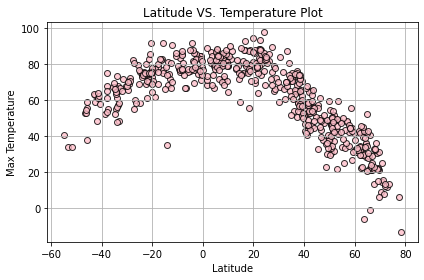

In [10]:
# Plotting
lat_temp = plt.scatter(lat, max_temps, marker="o", facecolors="pink", edgecolors = "black", alpha = 0.8)

# Formating
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude VS. Temperature Plot")
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

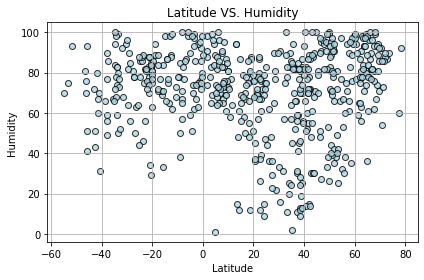

In [11]:
# Plotting
lat_humid = plt.scatter(lat, humidity_level, marker="o", facecolors="lightblue", edgecolors = "black", alpha = 0.8)

# Formating
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude VS. Humidity")
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_vs_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

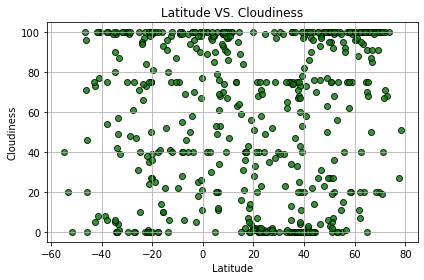

In [12]:
# Plotting
lat_cloud = plt.scatter(lat, cloudiness, marker="o", facecolors="green", edgecolors = "black", alpha = 0.8)

# Formating
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude VS. Cloudiness")
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

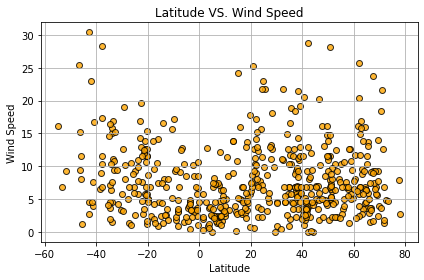

In [13]:
# Plotting
lat_wind = plt.scatter(lat, wind_speed, marker="o", facecolors="orange", edgecolors = "black", alpha = 0.8)

# Formating
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude VS. Wind Speed")
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [14]:
# Creating the Northern and Southern Hemispheres
Northern_H = pd.DataFrame(new_weather_df[(new_weather_df["Lat"]>0)])
Southern_H = pd.DataFrame(new_weather_df[(new_weather_df["Lat"]<0)])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

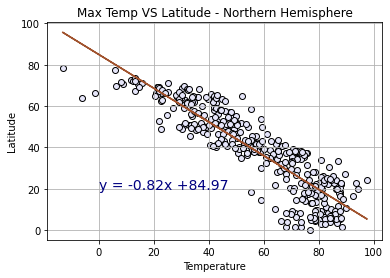

The r-value is: -0.89104


<Figure size 432x288 with 0 Axes>

In [15]:
# Linear Regression
x_value = Northern_H["Max Temp"]
y_value = Northern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='lavender', edgecolors = "black")
plt.title("Max Temp VS Latitude - Northern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(0,20), fontsize=14, color='navy')
plt.show()
plt.savefig("../output_data/Lat_vs_Temp_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Northern_H['Max Temp'], Northern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

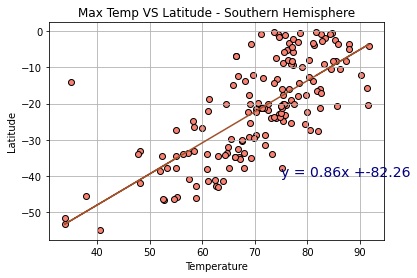

The r-value is: 0.72732


<Figure size 432x288 with 0 Axes>

In [16]:
# Linear Regression
x_value = Southern_H["Max Temp"]
y_value = Southern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='salmon', edgecolors = "black")
plt.title("Max Temp VS Latitude - Southern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(75,-40), fontsize=14, color='navy')
plt.show()
plt.savefig("../output_data/Lat_vs_Temp_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Southern_H['Max Temp'], Southern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

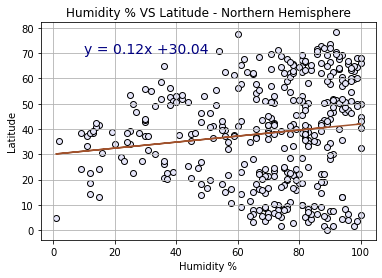

The r-value is: 0.13758


<Figure size 432x288 with 0 Axes>

In [17]:
# Linear Regression
x_value = Northern_H["Humidity"]
y_value = Northern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='lavender', edgecolors = "black")
plt.title("Humidity % VS Latitude - Northern Hemisphere")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(10,70), fontsize=14, color='navy')
plt.show()
plt.savefig("../output_data/Lat_vs_Humid_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Northern_H['Humidity'], Northern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

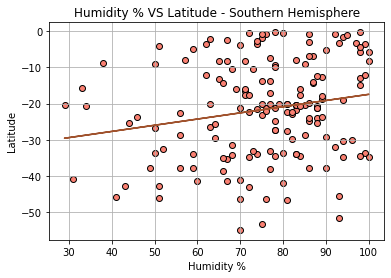

The r-value is: 0.19595


<Figure size 432x288 with 0 Axes>

In [18]:
# Linear Regression
x_value = Southern_H["Humidity"]
y_value = Southern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='salmon', edgecolors = "black")
plt.title("Humidity % VS Latitude - Southern Hemisphere")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(25,-48), fontsize=14, color='navy')
plt.show()
plt.savefig("../output_data/Lat_vs_Humidity_Southern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Southern_H['Humidity'], Southern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

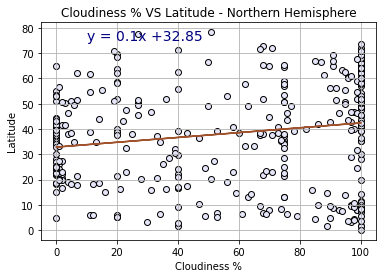

The r-value is: 0.1883


<Figure size 432x288 with 0 Axes>

In [19]:
# Linear Regression
x_value = Northern_H["Cloudiness"]
y_value = Northern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='lavender', edgecolors = "black")
plt.title("Cloudiness % VS Latitude - Northern Hemisphere")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(10,75), fontsize=14, color='navy')
plt.show()
plt.savefig("../output_data/Lat_vs_cloud_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Northern_H['Cloudiness'], Northern_H['Lat'])[0],4)
print(f'The r-value is: {correlation_coe}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

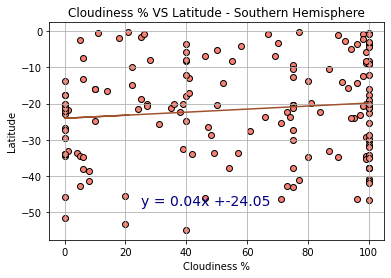

The r-value is: 0.12


<Figure size 792x576 with 0 Axes>

In [20]:
# Linear Regression
x_value = Southern_H["Cloudiness"]
y_value = Southern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='salmon', edgecolors = "black")
plt.rcParams["figure.figsize"] = (11,8)
plt.title("Cloudiness % VS Latitude - Southern Hemisphere")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(25,-48), fontsize=14, color='navy')
plt.show()
plt.savefig("../output_data/Lat_vs_cloud_Southern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Southern_H['Cloudiness'], Southern_H['Lat'])[0],2)
print(f'The r-value is: {correlation_coe}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

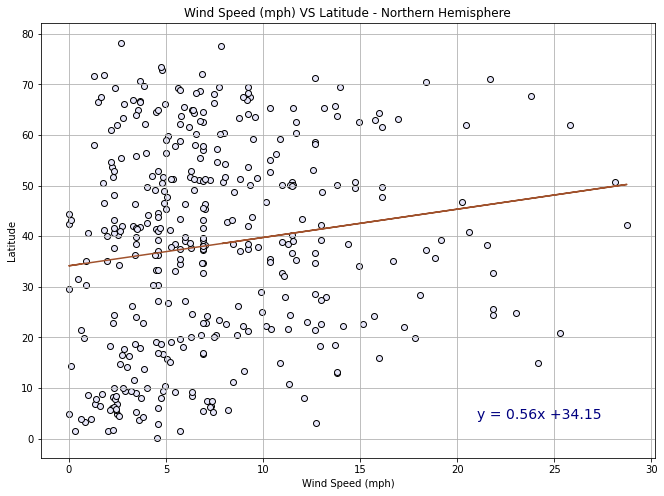

The r-value is: 0.14556


<Figure size 792x576 with 0 Axes>

In [21]:
# Linear Regression
x_value = Northern_H["Wind Speed"]
y_value = Northern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='lavender', edgecolors = "black")
plt.title("Wind Speed (mph) VS Latitude - Northern Hemisphere")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(21,4), fontsize=14, color='navy')
plt.show()
plt.savefig("../output_data/Lat_vs_wind_Northern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Northern_H['Wind Speed'], Northern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

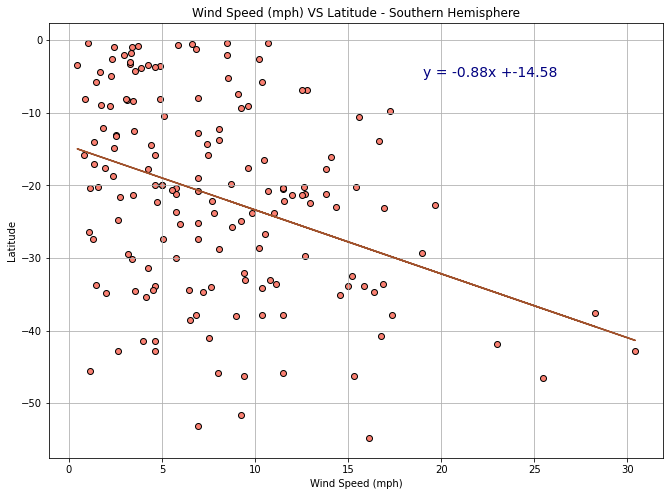

The r-value is: -0.36255


<Figure size 792x576 with 0 Axes>

In [22]:
# Linear Regression
x_value = Southern_H["Wind Speed"]
y_value = Southern_H["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, color='salmon', edgecolors = "black")
plt.title("Wind Speed (mph) VS Latitude - Southern Hemisphere")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.plot(x_value, regression_value, 'sienna')
plt.annotate(line_eq,(19,-5), fontsize=14, color='navy')
plt.show()
plt.savefig("../output_data/Lat_vs_wind_Southern.png")

# R-Value
import scipy.stats as st
correlation_coe = round(st.pearsonr(Southern_H['Wind Speed'], Southern_H['Lat'])[0],5)
print(f'The r-value is: {correlation_coe}')